# Exploratory data analysis.

## Introduction

**What is Exploratory Data Analysis ?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data.



---



## 1. Importing the required libraries for EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
sns.set(color_codes=True)
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance



---



## 2. Loading the data into the data frame.

In [ ]:
df = pd.read_csv("data.csv")
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.tail(5)                        # To display the botton 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995




---



## 3. Checking the types of data

In [ ]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object




---



## 4. Dropping irrelevant columns

In [ ]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 5. Renaming the columns

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 6. Dropping the duplicate rows

In [ ]:
df.shape

(11914, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [ ]:
df.count()      # Used to count the number of rows

,0
Make,11914
Model,11914
Year,11914
HP,11845
Cylinders,11884
Transmission,11914
Drive Mode,11914
MPG-H,11914
MPG-C,11914
Price,11914


So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [ ]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.count()

,0
Make,10925
Model,10925
Year,10925
HP,10856
Cylinders,10895
Transmission,10925
Drive Mode,10925
MPG-H,10925
MPG-C,10925
Price,10925




---



## 7. Dropping the missing or null values.

In [ ]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

,0
Make,10827
Model,10827
Year,10827
HP,10827
Cylinders,10827
Transmission,10827
Drive Mode,10827
MPG-H,10827
MPG-C,10827
Price,10827


In [ ]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64




---



### 7.1 **Removing Categorical Variables**

In [ ]:
df_Num = df.drop(['Make', 'Model', 'Transmission', 'Drive Mode'], axis=1)
df_Cat = df.drop(['Year', 'HP', 'Cylinders', 'MPG-H','MPG-C', 'Price'], axis=1)

## 7.2 Central Tendency for Numeric and Categorical Data

In [ ]:
average_values = df_Num.mean()
print(average_values)

Year          2011.328909
HP             236.735285
Cylinders        5.436514
MPG-H           26.432053
MPG-C           19.251877
Price        30976.473615
dtype: float64


In [ ]:
Med_values = df_Num.median()
print(Med_values)

Year          2015.0
HP             240.0
Cylinders        6.0
MPG-H           25.0
MPG-C           18.0
Price        30845.0
dtype: float64


In [ ]:
Mod_values = df_Cat.mode()
print(Mod_values)

        Make           Model Transmission         Drive Mode
0  Chevrolet  Silverado 1500    AUTOMATIC  front wheel drive


# 7.3 Chi_2 for Categorical Variables

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Make'], df['Drive Mode'])
#print(contingency_table)
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 7052.817060322766
p-value: 0.0
Degrees of Freedom: 138
Expected Frequencies:
[[5.18265447e+01 2.85829870e+01 9.47010252e+01 7.08894431e+01]
 [1.05338506e+00 5.80955020e-01 1.92481759e+00 1.44084234e+00]
 [1.91716080e+01 1.05733814e+01 3.50316801e+01 2.62233306e+01]
 [6.74166436e+01 3.71811213e+01 1.23188325e+02 9.22139097e+01]
 [6.82593516e+01 3.76458853e+01 1.24728180e+02 9.33665835e+01]
 [1.55900988e+01 8.59813429e+00 2.84873003e+01 2.13244666e+01]
 [6.32031034e-01 3.48573012e-01 1.15489055e+00 8.64505403e-01]
 [3.87645701e+01 2.13791447e+01 7.08332872e+01 5.30229981e+01]
 [8.34280964e+01 4.60116376e+01 1.52445553e+02 1.14114713e+02]
 [2.19736123e+02 1.21187217e+02 4.01516948e+02 3.00559712e+02]
 [3.89752471e+01 2.14953357e+01 7.12182507e+01 5.33111665e+01]
 [1.08077307e+02 5.96059850e+01 1.97486284e+02 1.47830424e+02]
 [1.22192666e+01 6.73907823e+00 2.23278840e+01 1.67137711e+01]
 [1.45367138e+01 8.01717927e+00 2.65624827e+01 1.98836243e+01]
 [1.68120255e+02 9.

# 7.4 Calculate co-variance and co-relation co-efficient

In [ ]:
covariance = df_Num.cov()
correlation_matrix = df_Num.corr()

print("Covariance Matrix:")
print(covariance)
# Print the correlation coefficients
print("Correlation Coefficient Matrix:")
print(correlation_matrix)

Covariance Matrix:
                   Year            HP     Cylinders         MPG-H  \
Year          49.414348  2.432004e+02     -0.629043     14.994708   
HP           243.200400  1.206516e+04    153.078485   -346.446888   
Cylinders     -0.629043  1.530785e+02      3.127773     -8.117051   
MPG-H         14.994708 -3.464469e+02     -8.117051     56.319796   
MPG-C         10.934378 -3.455690e+02     -7.430456     41.941724   
Price      86173.961324  4.514939e+06  61116.248939 -97777.499099   

                  MPG-C         Price  
Year          10.934378  8.617396e+04  
HP          -345.568974  4.514939e+06  
Cylinders     -7.430456  6.111625e+04  
MPG-H         41.941724 -9.777750e+04  
MPG-C         44.136983 -9.686338e+04  
Price     -96863.376307  3.880605e+09  
Correlation Coefficient Matrix:
               Year        HP  Cylinders     MPG-H     MPG-C     Price
Year       1.000000  0.314971  -0.050598  0.284237  0.234135  0.196789
HP         0.314971  1.000000   0.788007 -0

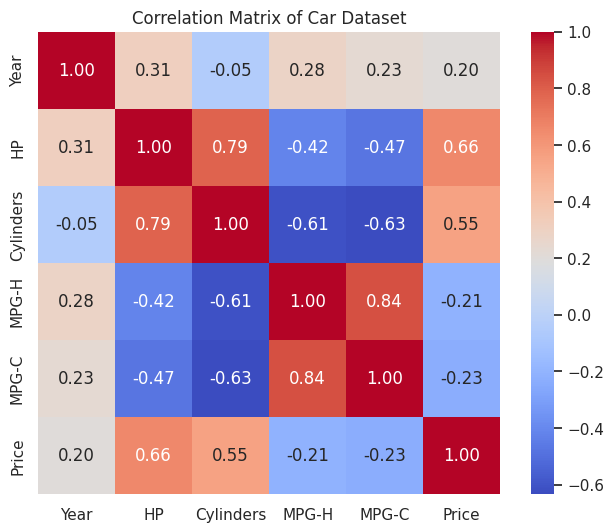

In [ ]:
# Plotting the rolling correlation
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Title and labels
plt.title('Correlation Matrix of our Dataset')
plt.show()

## 8. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them.

<Axes: xlabel='Price'>

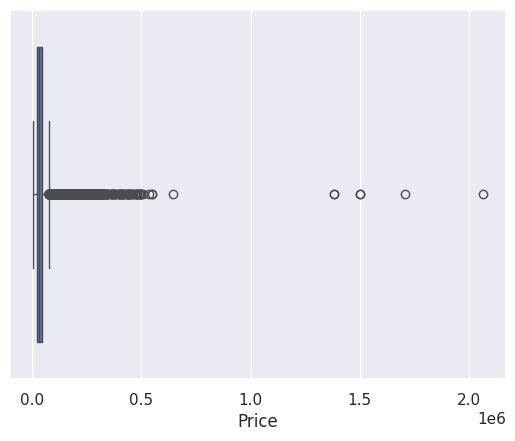

In [ ]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

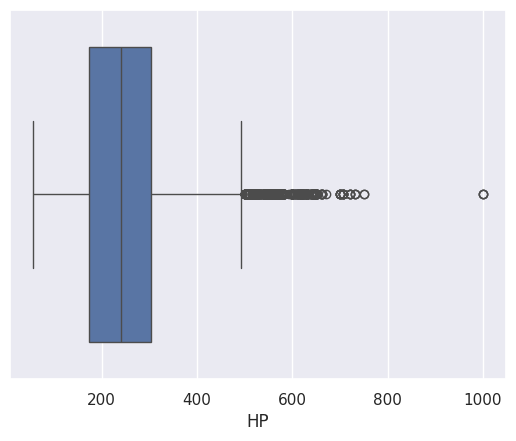

In [ ]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

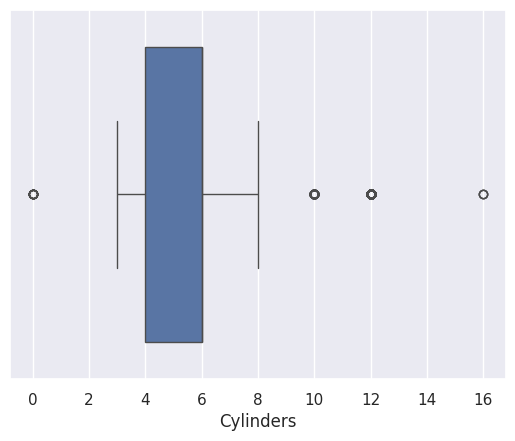

In [ ]:
sns.boxplot(x=df['Cylinders'])

In [ ]:
#print(df.dtypes)

In [ ]:
Q1 = df_Num.quantile(0.25)
Q3 = df_Num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [ ]:
df_Num = df_Num[~((df_Num < (Q1 - 1.5 * IQR)) |(df_Num > (Q3 + 1.5 * IQR))).any(axis=1)]
df_Num.shape

(9191, 6)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers.

# 8.1 Showing Histograms, Quantiles, QQ-Plots and Distances

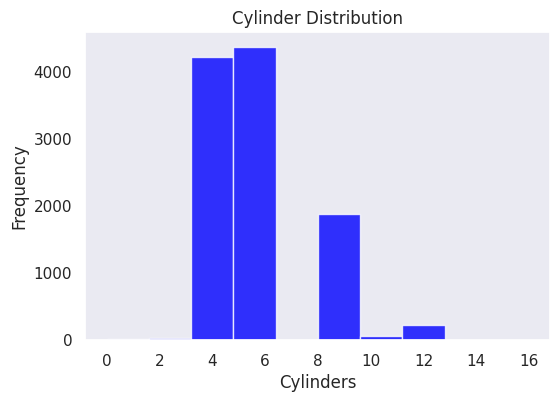

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df_Num['Cylinders'], bins=10, color='blue', alpha=0.8)

# Adding titles and labels
plt.title('Cylinder Distribution')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')

# Show the plot
plt.grid()
plt.show()

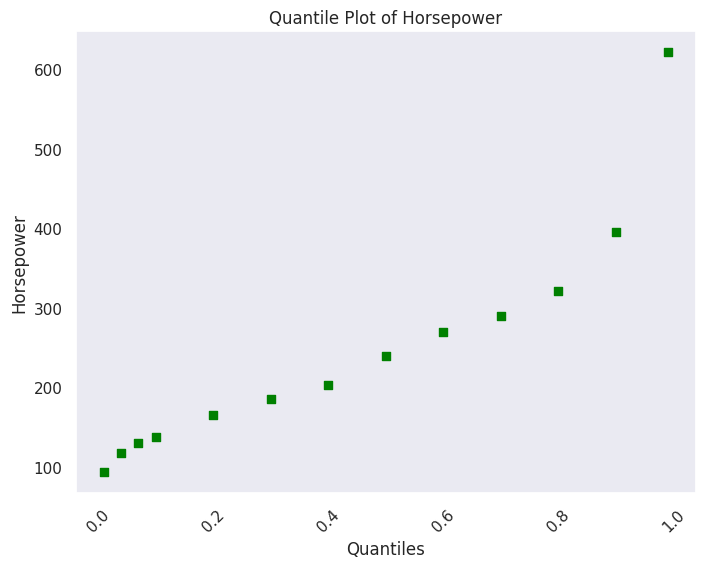

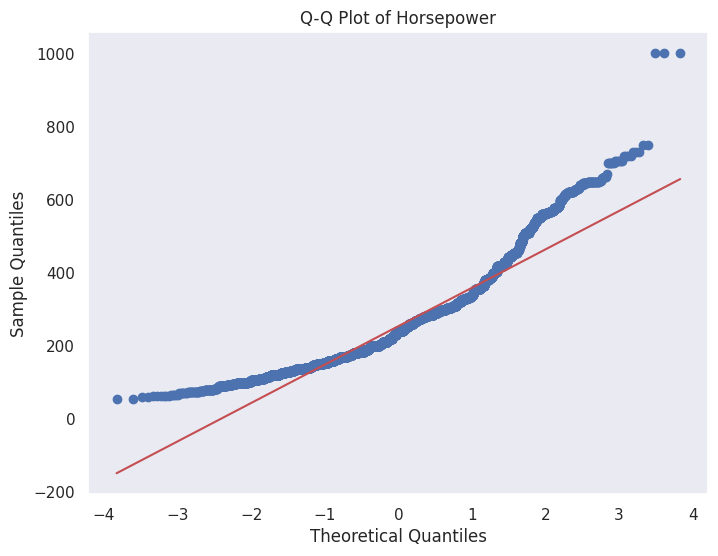

In [ ]:
# Create a quantile plot for Horsepower
quantiles = df_Num['HP'].quantile([0.01,0.04,0.07,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
# Prepare data for plotting
quantiles_values = quantiles.values
quantiles_index = quantiles.index

# Create a quantile plot
plt.figure(figsize=(8, 6))
plt.scatter(quantiles_index, quantiles_values, marker='s',  color='green')
plt.title('Quantile Plot of Horsepower')
plt.xlabel('Quantiles')
plt.ylabel('Horsepower')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()

# Create a Q-Q plot to compare Horsepower against a normal distribution
# Create a Q-Q plot to compare Horsepower against a normal distribution
plt.figure(figsize=(8, 6))
stats.probplot(df_Num['HP'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Horsepower')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

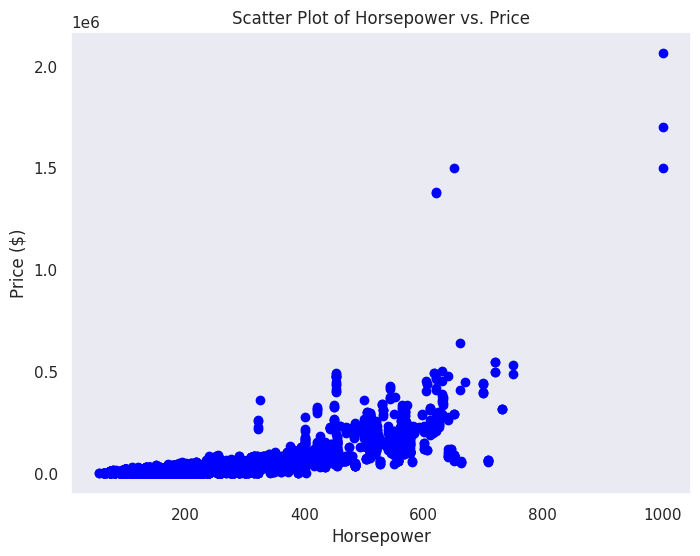

In [ ]:
# Create a scatter plot between Horsepower and Price
plt.figure(figsize=(8, 6))
plt.scatter(df_Num['HP'], df_Num['Price'], color='blue', marker='o')

# Adding titles and labels
plt.title('Scatter Plot of Horsepower vs. Price')
plt.xlabel('Horsepower')
plt.ylabel('Price ($)')
plt.grid()

# Show the plot
plt.show()

In [ ]:
# Data Matrix
data_matrix = df.select_dtypes(include=['int64', 'float64'])

# Dissimilarity Matrix (using Euclidean distance)
#Mahlanobis for cityblock/manahatten, euclidean, chebyshev supermum
dissimilarity_matrix = pairwise_distances(data_matrix, metric='euclidean')

print("Dissimilarity Matrix:\n", dissimilarity_matrix)

Dissimilarity Matrix:
 [[    0.          5485.11203167  9785.0628511  ...  4485.13868236
   4785.13030126 17140.37995495]
 [ 5485.11203167     0.          4300.00011628 ...  9970.00175527
  10270.00185005 11655.26915176]
 [ 9785.0628511   4300.00011628     0.         ... 14270.00147162
  14570.00154427  7355.4268401 ]
 ...
 [ 4485.13868236  9970.00175527 14270.00147162 ...     0.
    300.00166666 21625.14536367]
 [ 4785.13030126 10270.00185005 14570.00154427 ...   300.00166666
      0.         21925.14367114]
 [17140.37995495 11655.26915176  7355.4268401  ... 21625.14536367
  21925.14367114     0.        ]]


In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
# Select only numeric columns for the cosine similarity calculation
data_matrix = df_Num
#print(data_matrix)
# Calculate cosine similarity
cosine_sim = cosine_similarity(data_matrix)

print("Cosine Similarity Matrix:\n", cosine_sim)

Cosine Similarity Matrix:
 [[1.         0.99998276 0.99993098 ... 0.99999175 0.99999085 0.99967446]
 [0.99998276 1.         0.99998259 ... 0.99995182 0.99994967 0.99980703]
 [0.99993098 0.99998259 1.         ... 0.99987649 0.99987305 0.99990447]
 ...
 [0.99999175 0.99995182 0.99987649 ... 1.         0.99999998 0.99956785]
 [0.99999085 0.99994967 0.99987305 ... 0.99999998 1.         0.99956148]
 [0.99967446 0.99980703 0.99990447 ... 0.99956785 0.99956148 1.        ]]


# **Calculating PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_Num)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("PCA Result:\n", pca_df)
# Print explained variance
print("Explained variance by each principal component:", pca.explained_variance_ratio_)

PCA Result:
             PC1       PC2
0      0.491042  0.266129
1      0.194216  0.219819
2      0.101495  0.242090
3     -0.098730 -0.127869
4     -0.069909 -0.094684
...         ...       ...
10822  0.719718 -0.054197
10823  0.779928  0.015128
10824  0.745400 -0.024627
10825  0.744556  0.072751
10826  0.058340 -0.788680

[10827 rows x 2 columns]
Explained variance by each principal component: [0.53413473 0.2600352 ]




---



## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval.

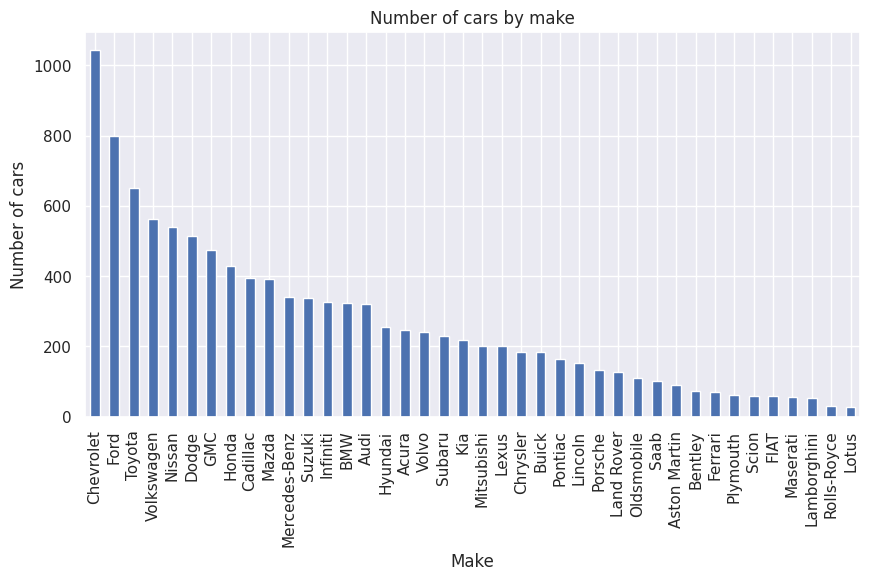

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


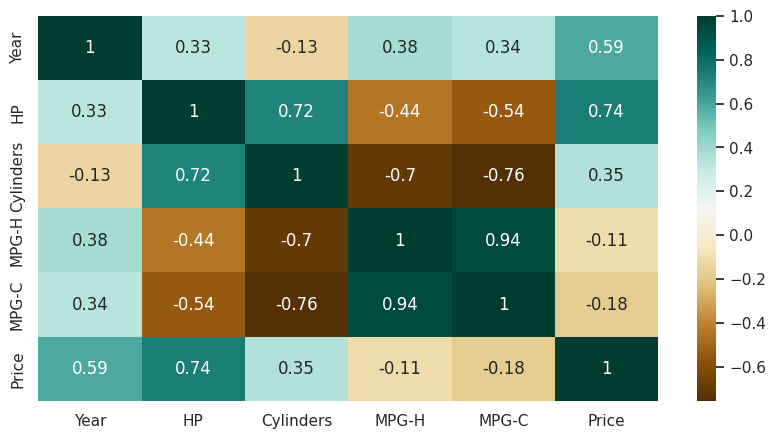

In [ ]:
plt.figure(figsize=(10,5))
c= df_Num.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. The scatter plots are plotted between Horsepower and Price.

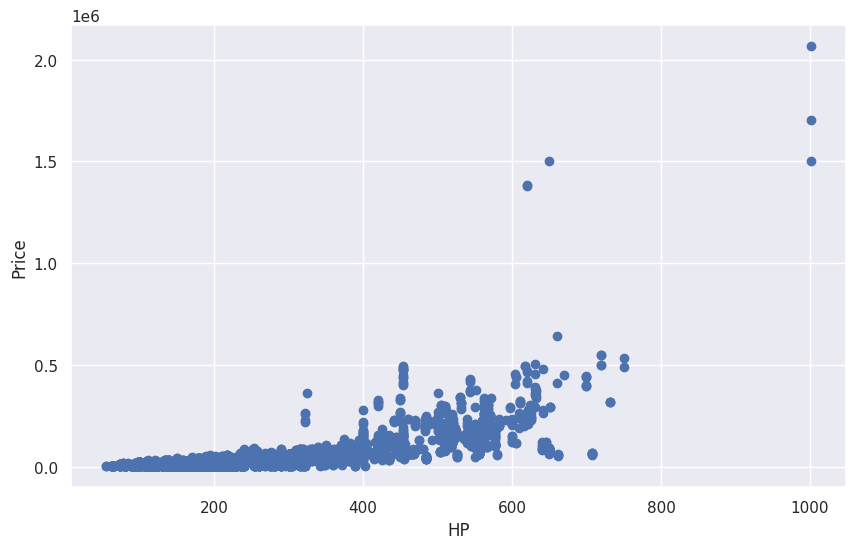

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()